<a href="https://colab.research.google.com/github/guscldns/closetclip/blob/main/%EC%9C%A0%EC%82%AC%EB%8F%84_%ED%85%8C%EC%8A%A4%ED%8A%B8%20%EC%B6%94%EA%B0%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/ultralytics/yolov5

In [ ]:
%cd /content/yolov5
!pip install -r requirements.txt

In [ ]:
!curl -L https://app.roboflow.com/ds/CGLZzGaJXr?key=Vo5SslBkIx > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

In [ ]:
import yaml

In [ ]:
# YAML 파일 로드
yaml_path = '/content/yolov5/data/hyps/hyp.scratch-low.yaml'
with open(yaml_path, 'r') as f:
    hyps = yaml.safe_load(f)
#cutouts 사용하기
hyps['cutouts'] = 0.5
hyps['Mosaic'] = 1
hyps['anchor_t'] = 4.0
hyps['box'] = 0.05
hyps['cls'] = 0.5
hyps['cls_pw'] = 1.0
hyps['copy_paste'] = 0.0
hyps['cutouts'] = 0.5
hyps['degrees'] = 0.0
hyps['fl_gamma'] = 0.0
hyps['fliplr'] = 0.5
hyps['flipud'] = 0.0
hyps['hsv_h'] = 0.015
hyps['hsv_s'] = 0.7
hyps['hsv_v'] = 0.4
hyps['iou_t'] = 0.2
hyps['lr0'] = 0.01
hyps['lrf'] = 0.01
hyps['mixup'] = 0.0
hyps['momentum'] = 0.95
hyps['mosaic'] = 1.0
hyps['obj'] = 1.0
hyps['obj_pw'] = 1.0
hyps['perspective'] = 0.0
hyps['scale'] = 0.5
hyps['shear'] = 0.0
hyps['translate'] = 0.1
hyps['warmup_bias_lr'] = 0.1
hyps['warmup_epochs'] = 3.0
hyps['warmup_momentum'] = 0.8
hyps['weight_decay'] = 0.0005

#mixup 사용하기
hyps['mixup'] = 0.5
# YAML 파일 저장
with open(yaml_path, 'w') as f:
    yaml.dump(hyps, f)

In [ ]:
# !python train.py --img 416 --batch 8 --epochs 10 --data /content/yolov5/data.yaml --cfg /content/yolov5/models/yolov5x.yaml --exist-ok

In [ ]:
!gdown 1_A_b0XfI6EzaTnkNgK62Ft4k02wc3R1t

In [ ]:
!unzip /content/X_0.95_9000-20230808T042643Z-001.zip

In [ ]:
# !python train.py --img 416 --batch 8 --epochs 10 --data /content/yolov5/data.yaml --cfg /content/yolov5/models/yolov5x.yaml --exist-ok --save-crop

In [ ]:
%cd /content
!gdown 1eFBf_-o-alcvHGZKDJUrrO9cWcLxhofB

In [ ]:
!unzip /content/소피스트케이티드.zip

### cutmix 실험

In [ ]:
import os
os.mkdir('/content/cutmix')

In [ ]:
!gdown 1z9U3kcQo3-wg6uujqUKuMUMRh34gB8Ji

Downloading...
From: https://drive.google.com/uc?id=1z9U3kcQo3-wg6uujqUKuMUMRh34gB8Ji
To: /content/라벨링데이터.zip
100% 138M/138M [00:01<00:00, 77.3MB/s]


In [ ]:
import os
os.mkdir('/content/vaild/')

In [ ]:
%cd /content/vaild/

/content/vaild


In [ ]:
# !unzip '*.zip'
!unzip '/content/라벨링데이터.zip'

In [ ]:
# 라벨 사전 만들기

name =['dress', 'outer', 'pants_black', 'pants_jeans', 'pants_others', 'pants_white', 'shoes', 'skirt', 'top_black', 'top_others', 'top_white']

name_dic ={}
for idx, value in enumerate(name):
    name_dic[value] = idx
name_dic

In [ ]:
path = '/content/test'
os.mkdir(path)
os.mkdir('/content/data')

In [ ]:
import json
folder_pahtes = '/content/vaild/소피스트케이티드' # json 파일 폴더
save_folder = '/content/data'
img_txt_folder = path
label_path = {} # 라벨별 txt 파일 이름

data_json = {} # 데이터 개수 확인용 딕셔너리

color_dic = {'화이트':'white', '블랙': 'black'} # 화이트/ 블랙 확인용
key_dic = {'아우터':'outer', '원피스':'dress'} # 키 변경용

for pathes in os.listdir(folder_pahtes):
    json_path = f'{folder_pahtes}/{pathes}'
    filename = pathes.split('.')[0]

    with open(json_path, 'r', encoding = 'utf-8') as file: # json 열기
        data = json.load(file)

        image_width = data['이미지 정보']['이미지 너비']
        image_height = data['이미지 정보']['이미지 높이']

        bbox = data['데이터셋 정보']['데이터셋 상세설명']['렉트좌표'] # bbox
        poly = data['데이터셋 정보']['데이터셋 상세설명']['폴리곤좌표'] # 폴리곤
        labeling = data['데이터셋 정보']['데이터셋 상세설명']['라벨링'] # 라벨링(소재/색상)

        for key, values in labeling.items():

            if '카테고리' in values[0] and '색상' in values[0]:
                # with open(f'{path}/{pathes[:-5]}.txt', 'a') as f:
                with open(f'{path}/{pathes[:-5]}.txt', 'a') as f:

                    # bbox 좌표 생성
                    try:
                        xmin, ymin, w, h = list(bbox[key][0].values()) # bbox 좌표 리스트

                        x_relative = (xmin + w / 2) / image_width
                        y_relative = (ymin + h / 2) / image_height

                        width_relative = w / image_width
                        height_relative = h / image_height
                    except:
                        continue

                    # 라벨 생성
                    color = labeling[key][0]['색상'] # 색상 저장 변수

                    if key == '하의':
                        if labeling[key][0]['카테고리'] == '청바지':
                            label = f'pants_jeans'

                        elif labeling[key][0]['카테고리'] == '스커트':
                            label = f'skirt'

                        else:
                            label = f'pants_{color_dic.get(color, "others")}'

                    elif key == '상의':
                        label = f'top_{color_dic.get(color, "others")}'

                    else:
                        label = key_dic.get(key, key) # 영문으로 변환

                        # 데이터 개수 확인용
                    if label not in data_json:
                        data_json[label] = 1
                    else:
                        data_json[label] += 1

                    # 라벨별 txt 파일 이름 저장
                    if label not in label_path:
                        label_path[label] = []
                        label_path[label].append(f'{pathes[:-5]}.txt')
                    else:
                        label_path[label].append(f'{pathes[:-5]}.txt')

                    label_num = name_dic.get(label, value) # 정수로 변환

                    f.write(f'{label_num} {x_relative} {y_relative} {width_relative} {height_relative}\n')
                f.close()

## cutmix

#### bbox 좌표로 생성

In [ ]:
def cutmix(img1, img2, bbox_ratio_path, alpha=1.0):
    # PIL 이미지를 넘파이 배열로 변환합니다.
    img1 = np.array(img1)
    img2 = np.array(img2)

    # img2의 크기를 img1과 동일하게 조정합니다.
    img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

    # txt 파일에서 바운딩 박스 비율을 읽어옵니다.
    with open(bbox_ratio_path, 'r') as file:
        bbox_values = [float(value) for value in file.readline().strip().split(' ')]
        x_center_ratio, y_center_ratio, width_ratio, height_ratio = bbox_values[1:]

    # 바운딩 박스 비율을 이용하여 바운딩 박스 좌표를 계산합니다.
    w, h = img1.shape[1], img1.shape[0]
    bbx1, bby1, bbx2, bby2 = bbox_from_ratios(w, h, x_center_ratio, y_center_ratio, width_ratio, height_ratio)

    # img1과 img2를 혼합할 마스크를 생성합니다.
    mask = np.zeros_like(img1)
    mask[bby1:bby2, bbx1:bbx2, :] = 1

    # img2에 투명성을 적용합니다.
    blended_img = cv2.addWeighted(img1, alpha, img2, (1 - alpha), 0, dtype=cv2.CV_32F)

    # img2의 일부를 자르고 img1 위에 붙입니다.
    mixed_img = img1.copy()
    mixed_img[bby1:bby2, bbx1:bbx2, :] = blended_img[bby1:bby2, bbx1:bbx2, :]

    # 넘파이 배열을 다시 PIL 이미지로 변환합니다.
    mixed_img = Image.fromarray(np.uint8(mixed_img))

    return mixed_img

def bbox_from_ratios(width, height, x_center_ratio, y_center_ratio, width_ratio, height_ratio):
    # 바운딩 박스 비율로부터 바운딩 박스 좌표를 계산합니다.
    x_center = int(x_center_ratio * width)
    y_center = int(y_center_ratio * height)
    w = int(width_ratio * width)
    h = int(height_ratio * height)

    bbx1 = max(0, x_center - w // 2)
    bby1 = max(0, y_center - h // 2)
    bbx2 = min(width, x_center + w // 2)
    bby2 = min(height, y_center + h // 2)

    return bbx1, bby1, bbx2, bby2

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# 이미지 파일 경로 설정
img_paths = '/content/╝╥╟╟╜║╞о─╔└╠╞╝╡х'
img1 = os.listdir(img_paths)[::2]
img2 = os.listdir(img_paths)[1::2]

for a, b in zip(img1, img2):

    img_path1 = f"{img_paths}/{a}"
    img_path2 = f"{img_paths}/{b}"
    print(img_path1,img_path2)

    # 이미지 파일을 PIL 이미지로 로드
    img1 = Image.open(img_path1)
    img2 = Image.open(img_path2)

    # txt 파일 경로 설정
    bbox_path = f'/content/test/{b[:-4]}.txt'

    # CutMix 증강 수행
    try:
        mixed_img = cutmix(img1, img2, bbox_path, alpha=0.1)
        mixed_img.save(f'/content/cutmix/mixed_img{a}.jpg','JPEG')
    except :
        continue
# # 이미지와 레이블 출력
# plt.imshow(mixed_img)
# plt.axis('off')  # 축 표시하지 않음
# plt.show()

In [ ]:
len(os.listdir('/content/╝╥╟╟╜║╞о─╔└╠╞╝╡х')), len(img1), len(img2)

(4049, 2025, 2024)

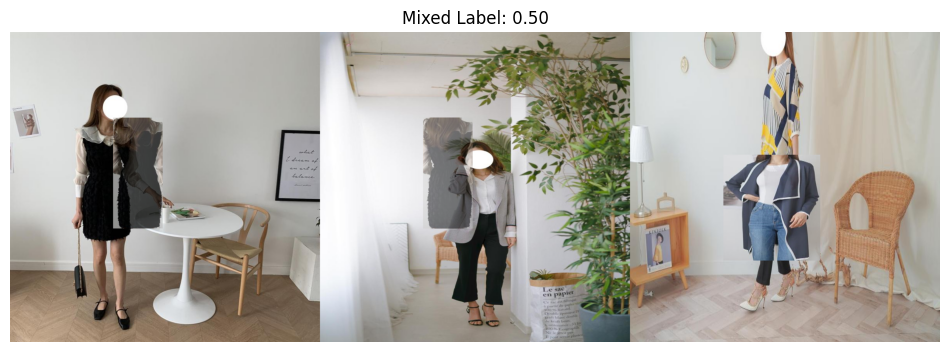

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image

# 이미지 파일 경로 설정
img_path1 = "/content/data/dress/1017579.jpg"
img_path2 = "/content/data/dress/1017589.jpg"

img_path3 = "/content/data/outer/1007194.jpg"
img_path4 = "/content/data/dress/1017589.jpg"

img_path5 = "/content/data/pants_black/1001376.jpg"
img_path6 = "/content/data/pants_jeans/1016846.jpg"

# 이미지 파일을 PIL 이미지로 로드
img1 = Image.open(img_path1)
img2 = Image.open(img_path2)

img3 = Image.open(img_path3)
img4 = Image.open(img_path4)

img5 = Image.open(img_path5)
img6 = Image.open(img_path6)

# txt 파일 경로 설정
bbox_path1 = f'{img_path2[:-4]}.txt'
bbox_path2 = f'{img_path4[:-4]}.txt'
bbox_path3 = f'{img_path6[:-4]}.txt'

# CutMix 증강 수행
mixed_img1 = cutmix(img1, img2, bbox_path1, alpha=0.3)
mixed_img2 = cutmix(img3, img4, bbox_path2, alpha=0.5)
mixed_img3 = cutmix(img5, img6, bbox_path3, alpha=0.1)

## 이미지 출력
# 이미지 크기를 조정할 너비를 설정합니다.
width = 800

# mixed_img1의 너비와 높이 정보를 얻습니다.
img_width, img_height = mixed_img1.size

# mixed_img1의 너비에 맞게 높이를 조정합니다.
height = int(width * img_height / img_width)

# 이미지 크기를 조정합니다.
mixed_img1_resized = mixed_img1.resize((width, height))
mixed_img2_resized = mixed_img2.resize((width, height))
mixed_img3_resized = mixed_img3.resize((width, height))

# 세 개의 이미지를 가로로 합칩니다.
combined_image = np.hstack((mixed_img1_resized, mixed_img2_resized, mixed_img3_resized))
cv2.imwrite(combined_image)
# 새로운 figure를 생성하고 크기를 설정합니다.
plt.figure(figsize=(12, 6))  # 가로 12, 세로 6

# 그림과 라벨을 표시합니다.
plt.imshow(combined_image)
plt.title("Mixed Label: {:.2f}".format(mixed_label))
plt.axis('off')  # 축 표시하지 않음
plt.show()

In [ ]:
!python /content/yolov5/detect.py --weights /content/yolov5/X_0.95_9000/x_0.95_9000/train/weights/best.pt --img 416 --conf 0.5 --source /content/╝╥╟╟╜║╞о─╔└╠╞╝╡х --save-crop --exist-ok

### 유사도 코드

In [ ]:
from os import listdir
import os

import cv2

import math
import numpy as np
from numpy.linalg import norm

import matplotlib.pyplot as plt

In [ ]:
# Cosine similarity

def cosine_similarity(img_path_1 ,img_path_2):
    # image 2 vector
    top1_w = cv2.imread(img_path_1)
    top2_w = cv2.imread(img_path_2)


    # image vector
    width_set = [top1_w.shape[0], top2_w.shape[0]]
    height_set = [top1_w.shape[1], top2_w.shape[1]]
    rsz_w = np.min(width_set)
    rsz_h = np.min(height_set)

    top1_w_r =cv2.resize(top1_w, (rsz_w, rsz_h))
    top2_w_r =cv2.resize(top2_w, (rsz_w, rsz_h))


    # image vector
    top1_w_f= top1_w_r.flatten()/255
    top2_w_f= top2_w_r.flatten()/255

    # vecotr 2 array & nomalization
    top1_w_array = np.array(top1_w_r)/255
    top2_w_array = np.array(top2_w_r)/255

    # cosine similarity
    ## A. norm
    top1_w_n = norm(top1_w_f)
    top2_w_n = norm(top2_w_f)

    ## B. np.dot
    dot_product12 = np.dot(top1_w_f,top2_w_f)

    ## cosine similarity
    result = dot_product12 / (top1_w_n * top2_w_n)

    return result


In [ ]:
# Define path
yolo_root = '/content/yolov5/runs'
crop_dir = os.path.join(yolo_root, 'detect/exp/crops')

# Label folder
folders = os.listdir(crop_dir) # ['dress','outer', 'pants_black','pants_jeans', 'pants_white', 'shoes', 'skirt', 'top_black', 'top_others', 'top_white']

categorical_cosine = {}
for label in folders: # iter label
    label_dir = os.path.join(crop_dir, label) # Label folder path
    # Img list
    img_list = os.listdir(label_dir)
    f__f_c_tmp = {}

    # Calculate Cosine Similarity
    for filename_1 in img_list: # iter image files
        f__f_c_tmp[filename_1] = {} # f_c

        if filename_1[-4:] == '.jpg':
            for filename_2 in img_list:
                if filename_2[-4:] == '.jpg':
                    # image paths
                    img_path_1 = os.path.join(label_dir, filename_1)
                    img_path_2 = os.path.join(label_dir, filename_2)

                    cos_value = cosine_similarity(img_path_1, img_path_2) # calculate
                    f__f_c_tmp[filename_1][filename_2] = cos_value # write

    categorical_cosine[label] = f__f_c_tmp # write


In [ ]:
print(categorical_cosine)
len(categorical_cosine)

In [ ]:
# Get images conditionally

label_dic = {}
for label, label_dict in categorical_cosine.items():
    img_in_condition = []
    for filename_1, filename_1_dict in label_dict.items():
        for filename_2, cosine_value in filename_1_dict.items():
            if cosine_value >= 0.6:
                files = (filename_1, filename_2) # to set
                img_in_condition.append((files, cosine_value))

    label_dic[label] = img_in_condition
print(label_dic)
print(label_dic.keys())
print(label_dic.items())

In [ ]:
%cd /content/yolov5/runs/detect/exp

In [ ]:
# testfile_path = ['/content/yolov5/runs/detect/exp/crops/dress/001117_jpg.rf.c3b2e91aecb20f8b1166706e14760d0d.jpg',
#  '/content/yolov5/runs/detect/exp/crops/outer/1152174_jpg.rf.7b889de1b8999f469be96723eb24cfee.jpg',
#  '/content/yolov5/runs/detect/exp/crops/pants_black/511315_jpg.rf.1a4e2e9b110eeab010507dc244544a63.jpg',
#  '/content/yolov5/runs/detect/exp/crops/pants_jeans/000320_jpg.rf.2f1f1142b0d3853c0d16d4b11a1c25b6.jpg',
#  '/content/yolov5/runs/detect/exp/crops/pants_others/261927_jpg.rf.5592b2e1719987586957e8179f21b06c.jpg',
#  '/content/yolov5/runs/detect/exp/crops/pants_white/1174822_jpg.rf.41fda44d79c6a691661996775c1f5684.jpg',
#  '/content/yolov5/runs/detect/exp/crops/shoes/000320_jpg.rf.2f1f1142b0d3853c0d16d4b11a1c25b6.jpg',
#  '/content/yolov5/runs/detect/exp/crops/skirt/001005_jpg.rf.838372757afea6dbae374ae40479a988.jpg',
#  '/content/yolov5/runs/detect/exp/crops/top_black/001052_jpg.rf.56578eece62c09bd4c0f4c31be54fac9.jpg',
#  '/content/yolov5/runs/detect/exp/crops/top_others/001005_jpg.rf.838372757afea6dbae374ae40479a988.jpg',
#  '/content/yolov5/runs/detect/exp/crops/top_white/1235410_jpg.rf.b9fff1ad351b3276d7572611df912c36.jpg'
#  ]


In [ ]:
# # Test each class
# len(testfile_path)

11

In [ ]:
testfile_path = ['/content/yolov5/runs/detect/exp/crops/dress/1012799.jpg',
                 '/content/yolov5/runs/detect/exp/crops/outer/1007194.jpg',
                 '/content/yolov5/runs/detect/exp/crops/pants_black/1001376.jpg',
                 '/content/yolov5/runs/detect/exp/crops/pants_jeans/1009588.jpg',
                 '/content/yolov5/runs/detect/exp/crops/pants_others/1008714.jpg',
                 '/content/yolov5/runs/detect/exp/crops/pants_white/1000986.jpg',
                 '/content/yolov5/runs/detect/exp/crops/skirt/1001976.jpg',
                 '/content/yolov5/runs/detect/exp/crops/top_black/1001976.jpg',
                 '/content/yolov5/runs/detect/exp/crops/top_others/1000986.jpg',
                 '/content/yolov5/runs/detect/exp/crops/top_white/1001376.jpg'
                 ]

In [ ]:
len(testfile_path)

In [ ]:
## The Picture for testing!!!!!

for label in label_dic:

    sorted_data = sorted(label_dic[label], key=lambda x: x[1], reverse=True)
    sorted_dic = {label : sorted_data}

    for i in range(len(label_dic[label])):
        if testfile_path[3] == os.path.join(f'{crop_dir}/{label}',sorted_dic[label][i][0][0]):
            testimage_name = sorted_dic[label][i][0][1]
            testimage_path = os.path.join(f'{crop_dir}/{label}', testimage_name)

            readimage = cv2.imread(testimage_path)

            showimage = cv2.cvtColor(readimage, cv2.COLOR_BGR2RGB)
        # show image
            plt.imshow(showimage)
            plt.xticks([]) # empty => no grid
            plt.yticks([]) # empty => no grid
            plt.show()
            print(sorted_dic[label][i][1])
